In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import glob

Data from National Data Buoy Center (NDBC)
* https://www.ndbc.noaa.gov
* station 44008 (Georges Bank)
* historical standard meteorological data

In [2]:
data_path = 'buoy_data_2023/'

In [3]:
data = pd.read_csv(data_path+'4400822023.txt', delim_whitespace=True, header=0)

Dropping the first row with the units

In [4]:
df = data.iloc[1: , :]

Adding the datetime column

In [5]:
df_date = pd.to_datetime(df['#YY'].astype(str) + ' ' + df['MM'].astype(str) + ' ' + df['DD'].astype(str) 
                      + ' ' + df['hh'].astype(str) + ' ' + df['mm'].astype(str), format='%Y %m %d %H %M')

df['datetime'] = df_date

/tmp/ipykernel_12228/863497144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = df_date


Filtering out entries where water temperature is missing:

In [6]:
df = df[df['WTMP'] != '999.0']

Converting water temperature to a float array

In [7]:
wtmp = df.WTMP.values.astype(float)

Dates of the spring and neap tides for 2023

In [8]:
dt1 = datetime(2023, 9, 17, 0, 0, 0)
dt2 = datetime(2023, 9, 9, 0, 0, 0)
dt3 = datetime(2023, 9, 2, 0, 0, 0)
dt4 = datetime(2023, 8, 26, 0, 0, 0)
dt5 = datetime(2023, 8, 18, 0, 0, 0)
dt6 = datetime(2023, 8, 11, 0, 0, 0)
dt7 = datetime(2023, 8, 4, 0, 0, 0)
dt8 = datetime(2023, 7, 27, 0, 0, 0)
dt9 = datetime(2023, 7, 19, 0, 0, 0)
dt10 = datetime(2023, 7, 13, 0, 0, 0)
dt11 = datetime(2023, 7, 5, 0, 0, 0)
dt12 = datetime(2023, 6, 27, 0, 0, 0)
dt13 = datetime(2023, 6, 19, 0, 0, 0)
dt14 = datetime(2023, 6, 13, 0, 0, 0)
dt15 = datetime(2023, 6, 6, 0, 0, 0)
dt16 = datetime(2023, 5, 28, 0, 0, 0)
dt17 = datetime(2023, 5, 20, 0, 0, 0)
dt18 = datetime(2023, 5, 13, 0, 0, 0)
dt19 = datetime(2023, 5, 7, 0, 0, 0)
dt20 = datetime(2023, 4, 29, 0, 0, 0)
dt21 = datetime(2023, 4, 20, 0, 0, 0)
dt22 = datetime(2023, 4, 14, 0, 0, 0)
dt23 = datetime(2023, 4, 7, 0, 0, 0)
dt24 = datetime(2023, 3, 30, 0, 0, 0)
dt25 = datetime(2023, 3, 23, 0, 0, 0)
dt26 = datetime(2023, 3, 17, 0, 0, 0)
dt27 = datetime(2023, 3, 10, 0, 0, 0)
dt28 = datetime(2023, 3, 1, 0, 0, 0)
dt29 = datetime(2023, 2, 23, 0, 0, 0)
dt30 = datetime(2023, 2, 15, 0, 0, 0)
dt31 = datetime(2023, 2, 8, 0, 0, 0)
dt32 = datetime(2023, 1, 31, 0, 0, 0)
dt33 = datetime(2023, 1, 24, 0, 0, 0)
dt34 = datetime(2023, 1, 17, 0, 0, 0)
dt35 = datetime(2023, 1, 9, 0, 0, 0)

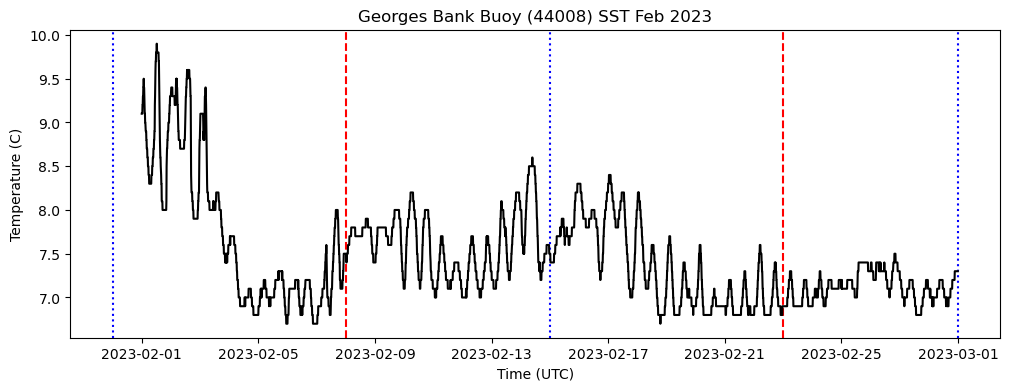

In [9]:
fig, ax = plt.subplots(1, figsize=(12,4))

ax.axvline(x=dt29, color='r', linestyle='--', label='Spring')
ax.annotate('Spring', (dt29, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='r')
ax.axvline(x=dt31, color='r', linestyle='--', label='Spring')

ax.axvline(x=dt28, color='b', linestyle=':', label='Neap')
ax.annotate('Neap', (dt28, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='b')
ax.axvline(x=dt30, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt32, color='b', linestyle=':', label='Neap')

ax.plot(df.datetime, wtmp, c='black')

ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Temperature (C)')
ax.set_title('Georges Bank Buoy (44008) SST Feb 2023')
plt.show()

**Running the buoy analysis over many months**

In [10]:
combined_df = pd.DataFrame()

buoy_files = sorted(glob.glob(data_path+'*.txt'))
for file_path in buoy_files:
    
    #--- Loading in the data
    print(file_path)
    df = pd.read_csv(file_path, delim_whitespace=True, header=0)
    
    #--- Removing the first row (has units data)
    df = df.iloc[1: , :]
    
    #--- Filtering out missing data from water temperature column
    df = df[df['WTMP'] != '999.0']
    
    #--- Creating the datetime column
    df_date = pd.to_datetime(df['#YY'].astype(str) + ' ' + df['MM'].astype(str) + ' ' + df['DD'].astype(str) 
                      + ' ' + df['hh'].astype(str) + ' ' + df['mm'].astype(str), format='%Y %m %d %H %M')
    df['Datetime'] = df_date
    
    #--- Creating the combined dataframe
    combined_df = pd.concat([combined_df, df], ignore_index=True)

buoy_data_2023/4400812023.txt
buoy_data_2023/4400822023.txt
buoy_data_2023/4400832023.txt
buoy_data_2023/4400842023.txt
buoy_data_2023/4400852023.txt
buoy_data_2023/4400862023.txt
buoy_data_2023/4400872023.txt
buoy_data_2023/4400882023.txt


Filter the data to 00z each day
* an average may be better

In [11]:
df_00m = combined_df[(combined_df['mm'] == '00')]

In [12]:
#--- Creating a float version of the WTMP variable
wtmp = df_00m.WTMP.values.astype(float)

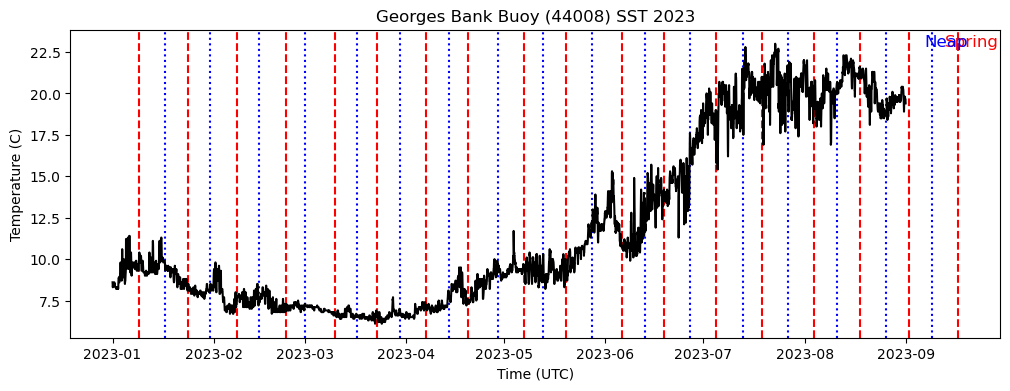

In [13]:
fig, ax = plt.subplots(1, figsize=(12,4))

ax.axvline(x=dt1, color='r', linestyle='--', label='Spring')
ax.annotate('Spring', (dt1, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='r')
ax.axvline(x=dt3, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt5, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt7, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt9, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt11, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt13, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt15, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt17, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt19, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt21, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt23, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt25, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt27, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt29, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt31, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt33, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt35, color='r', linestyle='--', label='Spring')

ax.axvline(x=dt2, color='b', linestyle=':', label='Neap')
ax.annotate('Neap', (dt2, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='b')
ax.axvline(x=dt4, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt6, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt8, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt10, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt12, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt14, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt16, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt18, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt20, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt22, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt24, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt26, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt28, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt30, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt32, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt34, color='b', linestyle=':', label='Neap')

ax.plot(df_00m.Datetime, wtmp, c='black')

ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Temperature (C)')
ax.set_title('Georges Bank Buoy (44008) SST 2023')
plt.show()

Calculate the difference between the spring tide and the average between the two nearest neap tides

In [14]:
spring_tides = [dt5, dt7, dt9, dt11, dt13, dt15, dt17, dt19, dt21, dt23, dt25, dt27, dt29, dt31, dt33, dt35]
neap_tides = [dt6, dt8, dt10, dt12, dt14, dt16, dt18, dt20, dt22, dt24, dt26, dt28, dt30, dt32, dt34]

In [15]:
temp_compare_df = pd.DataFrame(columns=['Datetime', 'Spring_Tide', 'Neap_Tide'])

for i in range(len(neap_tides)):
    
    #--- Find spring tide temperature
    spring_temp = float(df_00m[df_00m.Datetime == spring_tides[i]].WTMP.values)
    
    #--- Find neap tide temperature from nearest dates
    if i > 0: 
        neap_temp_1 = float((df_00m[df_00m.Datetime == neap_tides[i]].WTMP.values)[0])
        neap_temp_2 = float(df_00m[df_00m.Datetime == neap_tides[i-1]].WTMP.values)
        neap_temp_av = (neap_temp_1+neap_temp_2)/2
    else: 
        neap_temp_av = float((df_00m[df_00m.Datetime == neap_tides[i]].WTMP.values)[0])
    
    #--- Collect the datetime variable from spring tide
    dt = df_00m[df_00m.Datetime == spring_tides[i]].Datetime.values[0]
    
    temp_compare_df = temp_compare_df.append({'Datetime': dt, 'Spring_Tide': spring_temp, 'Neap_Tide': neap_temp_av}, ignore_index=True)

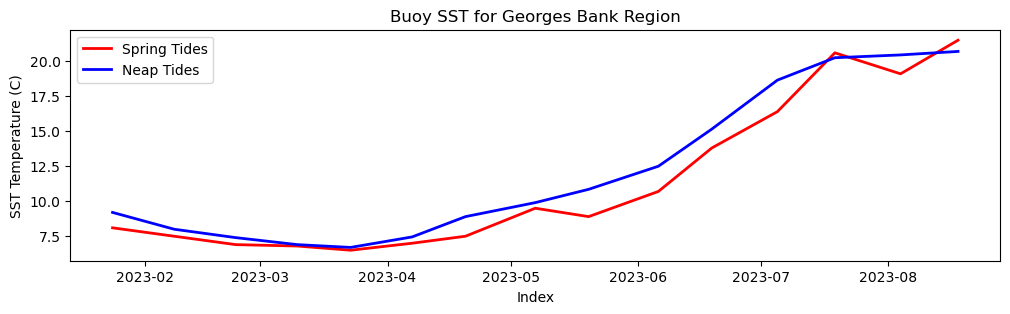

In [16]:
fig,ax=plt.subplots(1, figsize=(12,3))
ax.set_ylabel("SST Temperature (C)")
ax.set_xlabel("Index")
ax.set_title("Buoy SST for Georges Bank Region")

ax.plot(temp_compare_df.Datetime, temp_compare_df.Spring_Tide, c='red', label='Spring Tides', linewidth=2)
ax.plot(temp_compare_df.Datetime, temp_compare_df.Neap_Tide, c='blue', label='Neap Tides', linewidth=2)

ax.legend()